In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:


# Read the dataset into a DataFrame
df = pd.read_csv('merged_dataset.csv')

In [3]:
df.head(15)

,Year,State,co,no2,o3,pm25,so2,Deaths
0,2000,Alabama,0.324396,5.983593,57.601273,15.064598,3.251818,3064.0
1,2000,Arkansas,0.327984,6.059882,53.942551,12.076962,2.859271,2027.0
2,2000,Arizona,0.422265,9.915901,58.282240,7.400383,2.343078,2574.0
3,2000,California,0.462393,10.756098,48.635815,10.896779,1.930857,14060.0
4,2000,Colorado,0.383861,8.429847,59.836639,5.501561,2.511782,1463.0
5,2000,Connecticut,0.431218,13.493690,44.093941,11.036686,4.020772,1921.0
6,2000,Delaware,0.398522,9.591164,52.213648,13.645088,4.660076,489.0
7,2000,Florida,0.376840,6.763039,45.732861,11.127539,2.447119,12118.0
8,2000,Georgia,0.330269,6.155635,55.853840,14.971331,2.953149,4288.0
9,2000,Iowa,0.329047,6.481277,45.144532,9.944118,2.318968,1778.0


In [4]:

df.rename(columns={'pm25': 'PM2.5','co': 'CO', 'so2': 'SO2', 'o3': 'O3', 'no2': 'NO2'}, inplace=True)



**Dataset Description:**

The dataset contains information related to air quality and its potential impact on respiratory health. It includes the following parameters:

1. `Year`: This column represents the year of data collection. It is a categorical variable that indicates the year in which the data was recorded.

2. `State`: This column represents the state in the United States where the data was collected. It is a categorical variable and indicates the geographical location within the United States.

3. `CO`: This column represents the concentration of carbon monoxide (CO) in the air. It is a numerical variable and is typically measured in parts per million (ppm). CO is a common air pollutant and can have adverse effects on respiratory health.

4. `NO2`: This column represents the concentration of nitrogen dioxide (NO2) in the air. It is a numerical variable and is also typically measured in parts per million (ppm). NO2 is a major air pollutant and can have negative health effects, particularly on the respiratory system.

5. `O3`: This column represents the concentration of ozone (O3) in the air. It is a numerical variable and is measured in parts per million (ppm). Ozone is a common component of smog and can affect respiratory health, especially at high concentrations.

6. `PM2.5`: This column represents the concentration of fine particulate matter with a diameter of 2.5 micrometers or smaller (PM2.5) in the air. It is a numerical variable and is measured in micrograms per cubic meter (µg/m³). PM2.5 is a significant air pollutant known to be harmful to respiratory health.

7. `SO2`: This column represents the concentration of sulfur dioxide (SO2) in the air. It is a numerical variable and is typically measured in parts per million (ppm). SO2 is a harmful air pollutant, especially to individuals with respiratory conditions.

8. `Deaths`: This column represents the number of deaths due to **respiratory diseases** in the corresponding state and year. It is a numerical variable that indicates the impact of air pollutants on public health, particularly in terms of respiratory-related mortality.

This dataset provides valuable information for researchers and policymakers interested in understanding the relationships between air quality and public health, with a specific focus on respiratory health outcomes.


In [5]:
df.drop('Deaths',axis = 1, inplace = True)

In [6]:
df.head(10)

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,0.324396,5.983593,57.601273,15.064598,3.251818
1,2000,Arkansas,0.327984,6.059882,53.942551,12.076962,2.859271
2,2000,Arizona,0.422265,9.915901,58.282240,7.400383,2.343078
3,2000,California,0.462393,10.756098,48.635815,10.896779,1.930857
4,2000,Colorado,0.383861,8.429847,59.836639,5.501561,2.511782
5,2000,Connecticut,0.431218,13.493690,44.093941,11.036686,4.020772
6,2000,Delaware,0.398522,9.591164,52.213648,13.645088,4.660076
7,2000,Florida,0.376840,6.763039,45.732861,11.127539,2.447119
8,2000,Georgia,0.330269,6.155635,55.853840,14.971331,2.953149
9,2000,Iowa,0.329047,6.481277,45.144532,9.944118,2.318968


In [7]:
df.dtypes

Year       int64
State     object
CO       float64
NO2      float64
O3       float64
PM2.5    float64
SO2      float64
dtype: object

In [8]:
df.isnull().sum()

Year     0
State    0
CO       0
NO2      0
O3       0
PM2.5    0
SO2      0
dtype: int64

In [9]:
df.shape

(768, 7)

In [10]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

Exploratory Data Analysis

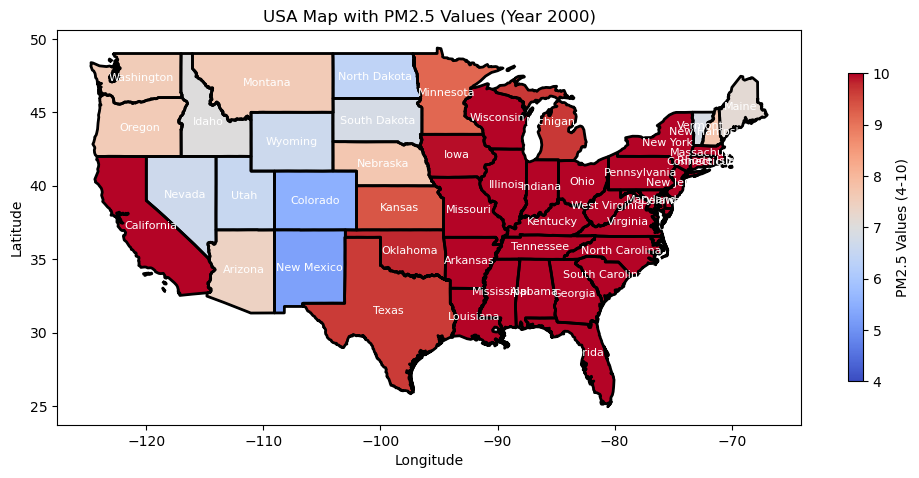

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load the shapefile (replace 'usa_shapefile.shp' with 'USA_States.shp')
gdf = gpd.read_file('USA_States.shp')

# Filter the DataFrame for the year 2000
df_2000 = df[df['Year'] == 2000]

# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_2000, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['PM2.5'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('USA Map with PM2.5 Values (Year 2000)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink=0.5)

# Show the map
plt.show()


# Show the map
plt.show()

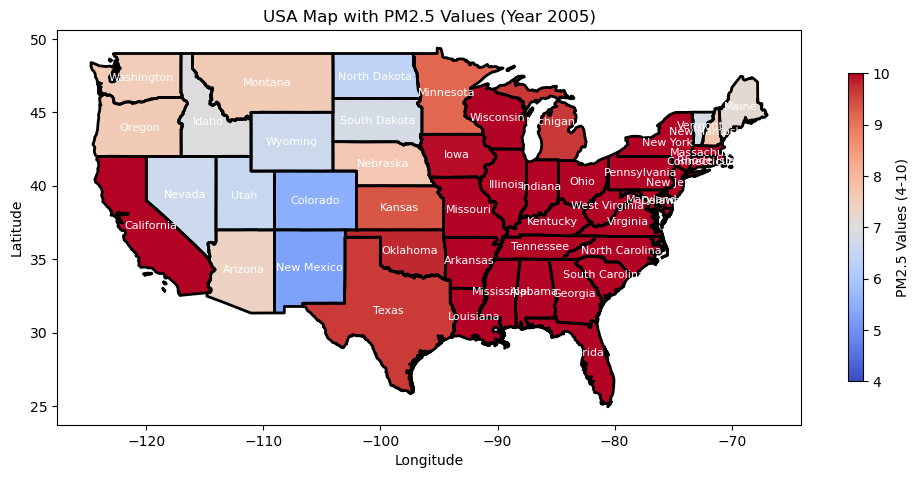

In [12]:
# Load the shapefile (replace 'usa_shapefile.shp' with 'USA_States.shp')
gdf = gpd.read_file('USA_States.shp')

# Filter the DataFrame for the year 2000
df_2000 = df[df['Year'] == 2000]

# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_2000, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['PM2.5'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('USA Map with PM2.5 Values (Year 2005)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink = 0.5)

# Show the map
plt.show()

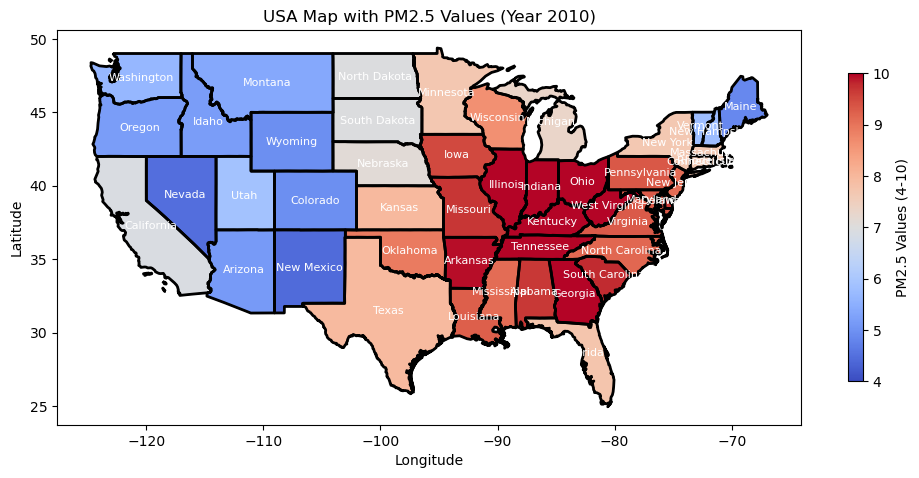

In [13]:
# Load the shapefile (replace 'usa_shapefile.shp' with 'USA_States.shp')
gdf = gpd.read_file('USA_States.shp')

# Filter the DataFrame for the year 2010
df_2010 = df[df['Year'] == 2010]

# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_2010, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['PM2.5'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('USA Map with PM2.5 Values (Year 2010)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink = 0.5)

# Show the map
plt.show()

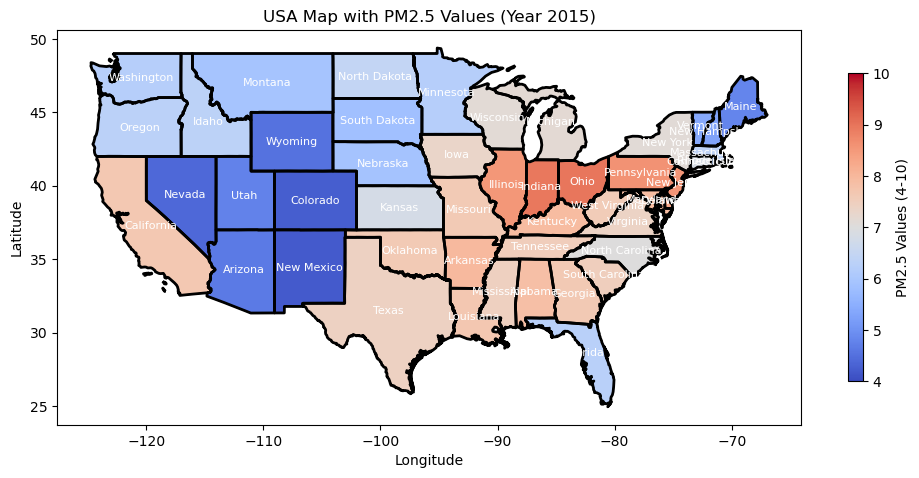

In [14]:
# Load the shapefile (replace 'usa_shapefile.shp' with 'USA_States.shp')
gdf = gpd.read_file('USA_States.shp')

# Filter the DataFrame for the year 2000
df_2015 = df[df['Year'] == 2015]

# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_2015, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['PM2.5'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('USA Map with PM2.5 Values (Year 2015)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink = 0.5)

# Show the map
plt.show()

In [15]:
df_predicted = pd.read_csv('predicted_2022_values.csv')

In [16]:
df_predicted.head()

,State,Predicted PM2.5,PM2.5_2022_Actual
0,Alabama,11.809813,8.137220
1,Arizona,4.101122,7.560903
2,Arkansas,10.566002,8.427775
3,California,7.758231,8.928093
4,Colorado,4.004642,6.168845


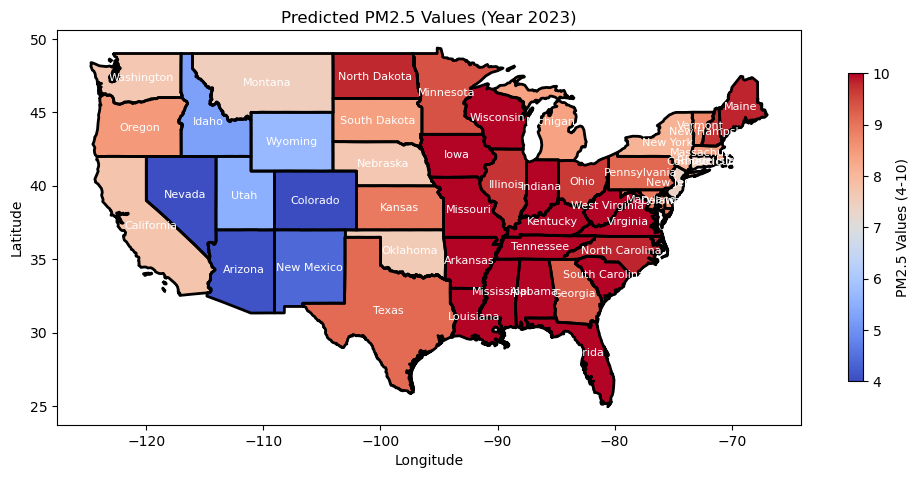

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

gdf = gpd.read_file('USA_States.shp')


# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_predicted, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['Predicted PM2.5'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('Predicted PM2.5 Values (Year 2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink = 0.5)

# Show the map
plt.show()

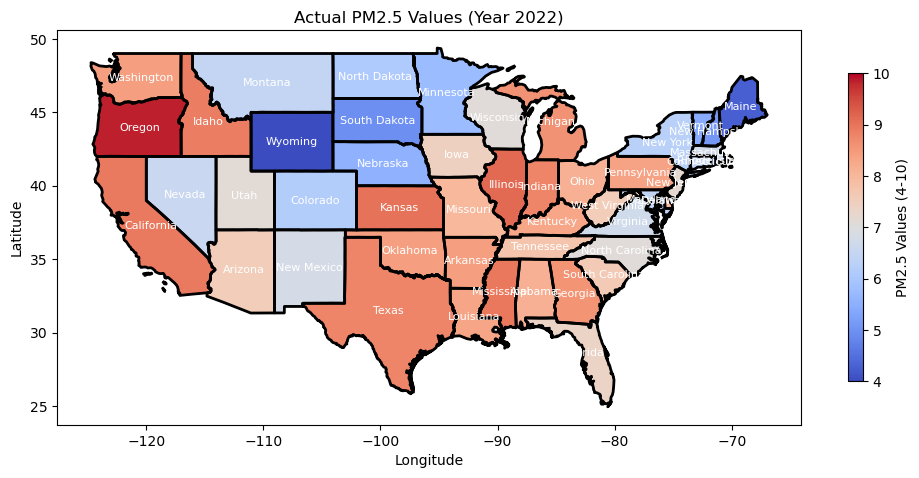

In [18]:
gdf = gpd.read_file('USA_States.shp')


# Merge the GeoDataFrame with the filtered DataFrame using the 'State' column
gdf = gdf.merge(df_predicted, left_on='STATE_NAME', right_on='State')

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a colormap from cool to warm colors
cmap = plt.get_cmap('coolwarm')

# Normalize the PM2.5 values to the new range (4 to 10)
norm = Normalize(vmin=4, vmax=10)

# Create a ScalarMappable for color mapping
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the map with colored states
gdf.boundary.plot(ax=ax, linewidth=2, color='black')

for geom, value, state_name in zip(gdf['geometry'], gdf['PM2.5_2022_Actual'], gdf['STATE_NAME']):
    # Check if it's a MultiPolygon
    if geom.geom_type == 'MultiPolygon':
        for poly in geom.geoms:
            color = cmap(norm(value))
            plt.fill(*poly.exterior.xy, color=color, edgecolor='black')
    else:
        color = cmap(norm(value))
        plt.fill(*geom.exterior.xy, color=color, edgecolor='black')

    # Annotate each state with its name
    x, y = geom.centroid.coords[0]
    ax.annotate(state_name, (x, y), fontsize=8, ha='center', va='center', color='white')

# Set title and labels
ax.set_title('Actual PM2.5 Values (Year 2022)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a color bar with the updated range
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='PM2.5 Values (4-10)', shrink = 0.5)

# Show the map
plt.show()

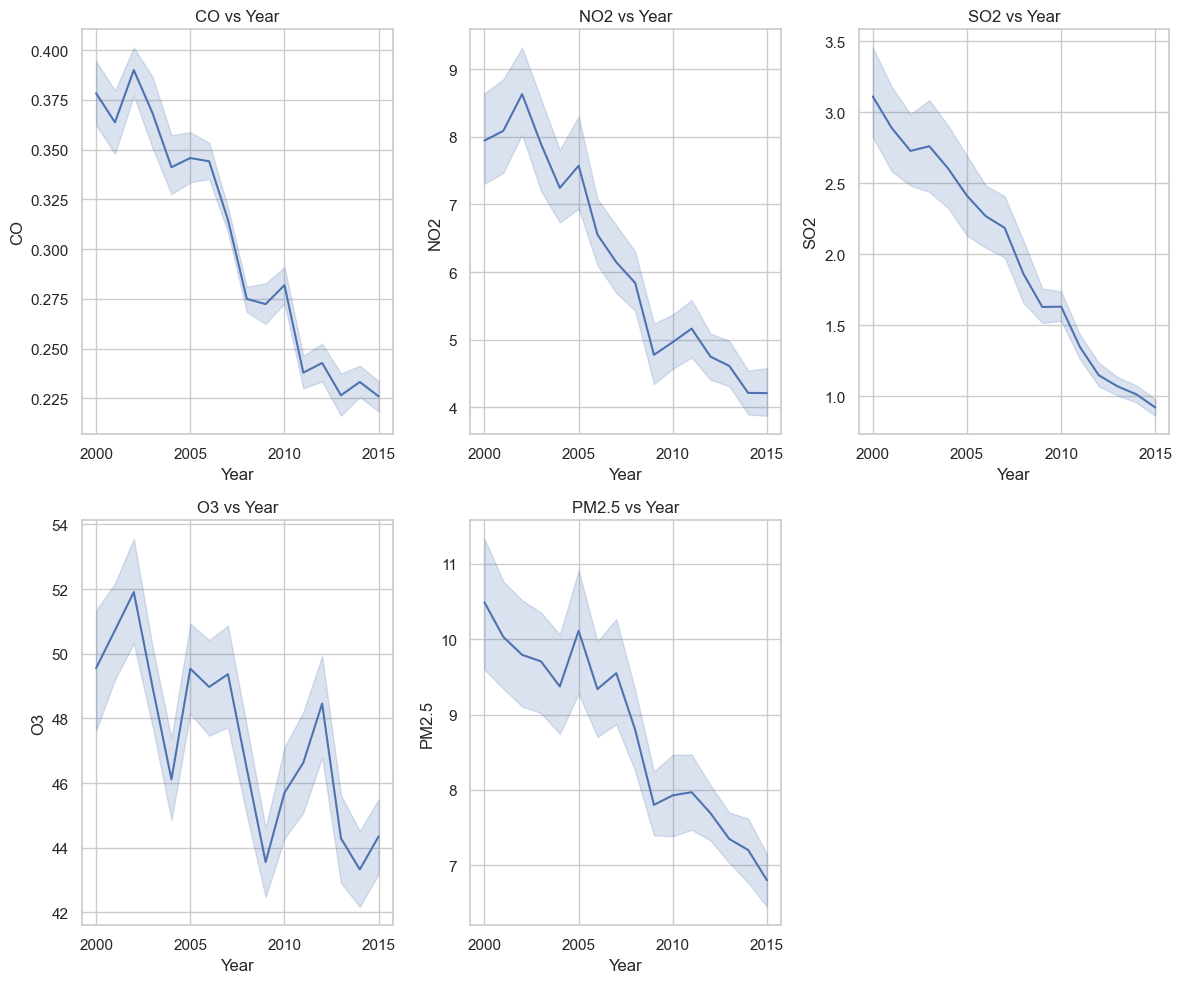

In [19]:



# Set the style for the plots (optional)
sn.set(style="whitegrid")

# Create subplots for CO, NO2, SO2, O3, and PM2.5
plt.figure(figsize=(12, 10))

# CO vs Year
plt.subplot(231)
sn.lineplot(x="Year", y="CO", data=df)
plt.title('CO vs Year')

# NO2 vs Year
plt.subplot(232)
sn.lineplot(x="Year", y="NO2", data=df)
plt.title('NO2 vs Year')

# SO2 vs Year
plt.subplot(233)
sn.lineplot(x="Year", y="SO2", data=df)
plt.title('SO2 vs Year')

# O3 vs Year
plt.subplot(234)
sn.lineplot(x="Year", y="O3", data=df)
plt.title('O3 vs Year')

# PM2.5 vs Year
plt.subplot(235)
sn.lineplot(x="Year", y="PM2.5", data=df)
plt.title('PM2.5 vs Year')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


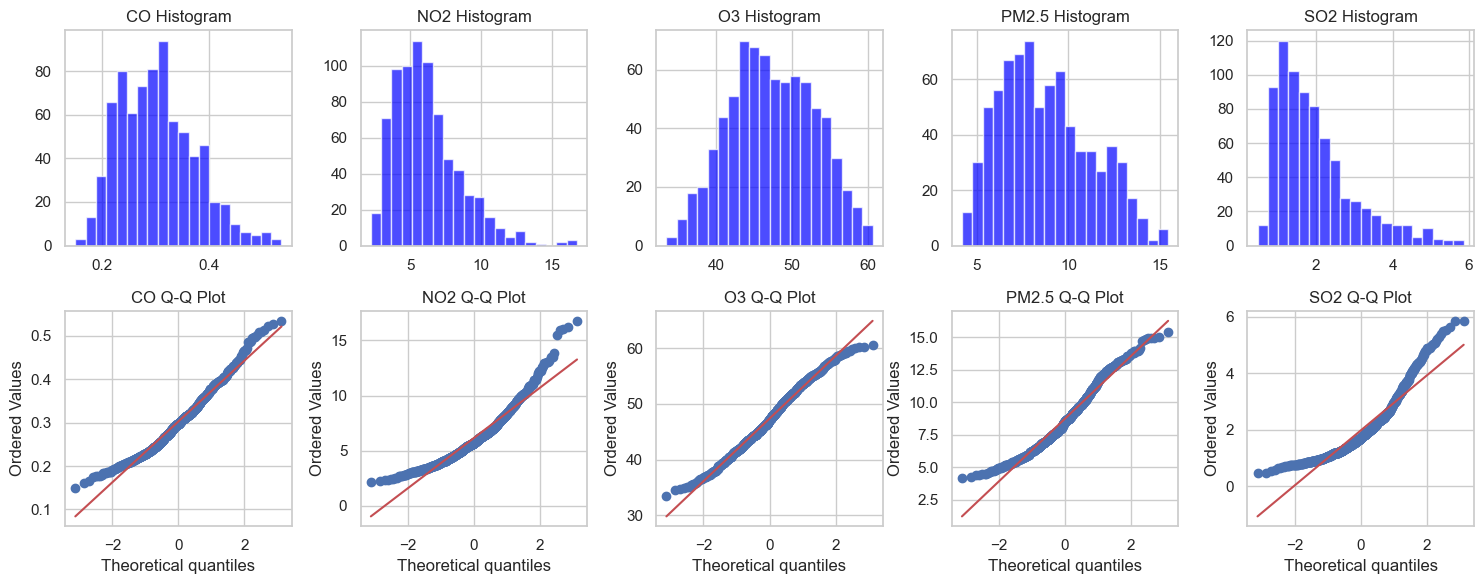

CO is not normally distributed (p-value: 5.951934990478106e-08)
NO2 is not normally distributed (p-value: 6.1438812558705206e-33)
O3 is not normally distributed (p-value: 1.5971914660976792e-08)
PM2.5 is not normally distributed (p-value: 1.0107494481868678e-11)
SO2 is not normally distributed (p-value: 4.7126602030509246e-35)


In [20]:
#Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df['CO']
no2 = df['NO2']
o3 = df['O3']
pm25 = df['PM2.5']
so2 = df['SO2']

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ['CO', 'NO2', 'O3', 'PM2.5', 'SO2']

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f'{var_names[i]} Histogram')
    
    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{var_names[i]} Q-Q Plot')

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f'{variable_name} is not normally distributed (p-value: {p_value})')
    else:
        print(f'{variable_name} is normally distributed (p-value: {p_value})')


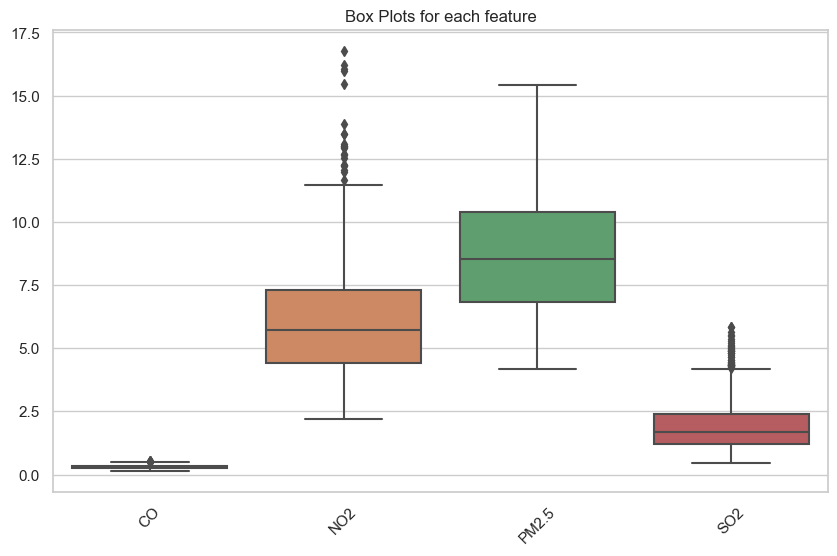

In [21]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(10, 6))  # Set the figure size
sn.boxplot(data=df[['CO','NO2', 'PM2.5', 'SO2']])
plt.title('Box Plots for each feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [22]:
import numpy as np
df['CO'] = np.log(df['CO'])
df['NO2'] = np.log(df['NO2'])
df['PM2.5'] = np.log(df['PM2.5'])
df['SO2'] = np.log(df['SO2'])
df['O3'] = np.log(df['O3'])

In [23]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992


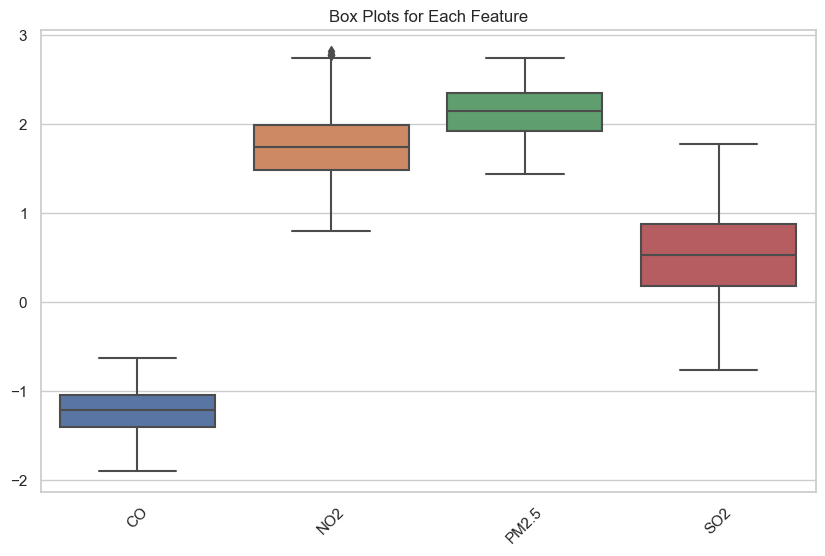

In [24]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(10, 6))  # Set the figure size
sn.boxplot(data=df[['CO', 'NO2', 'PM2.5', 'SO2']])
plt.title('Box Plots for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

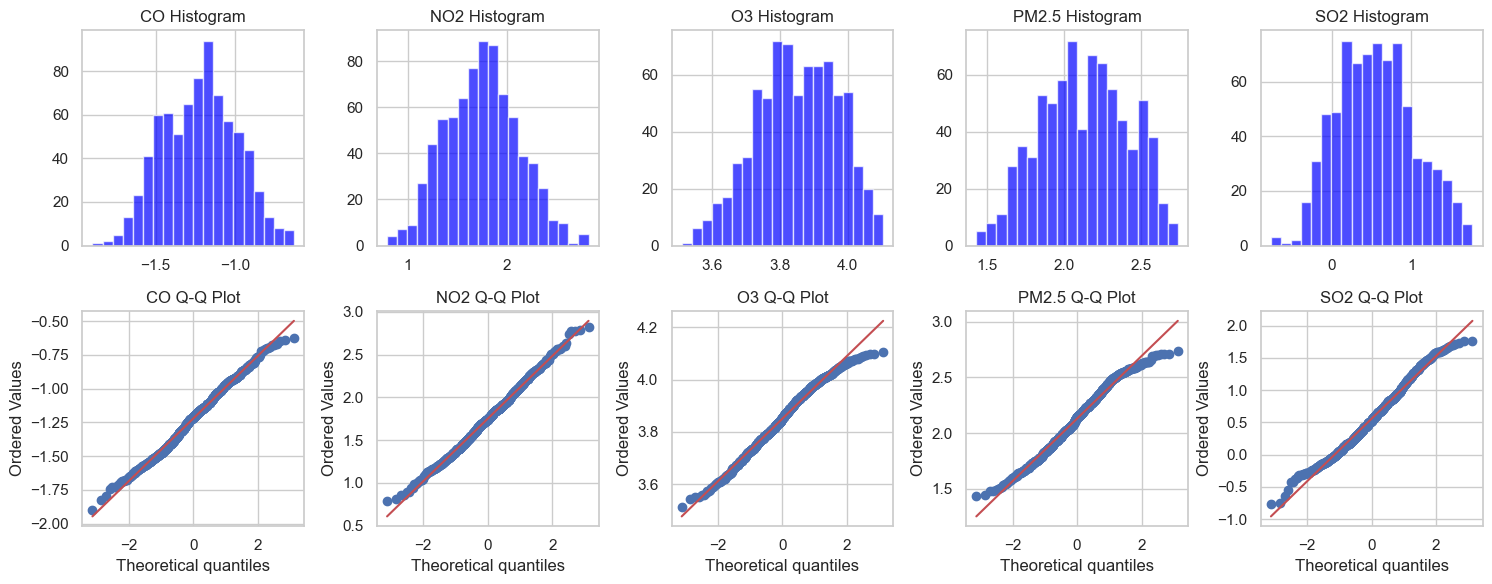

CO is not normally distributed (p-value: 0.00047520266698643134)
NO2 is normally distributed (p-value: 0.10736648371043549)
O3 is not normally distributed (p-value: 1.5847692783828248e-06)
PM2.5 is not normally distributed (p-value: 7.589604910910564e-13)
SO2 is not normally distributed (p-value: 6.406581433932922e-05)


In [25]:
#Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df['CO']
no2 = df['NO2']
o3 = df['O3']
pm25 = df['PM2.5']
so2 = df['SO2']

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ['CO', 'NO2', 'O3', 'PM2.5', 'SO2']

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f'{var_names[i]} Histogram')
    
    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{var_names[i]} Q-Q Plot')

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f'{variable_name} is not normally distributed (p-value: {p_value})')
    else:
        print(f'{variable_name} is normally distributed (p-value: {p_value})')


In [26]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992


In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the independent variables (features)
independent_vars = ['CO', 'NO2', 'O3', 'SO2']

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Variable         VIF
0       CO   61.337746
1      NO2   71.519121
2       O3  188.421114
3      SO2    5.697731


In [28]:
df.describe()

,Year,CO,NO2,O3,PM2.5,SO2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2007.500000,-1.222191,1.750875,3.850776,2.129277,0.558673
std,4.612776,0.232027,0.365603,0.120198,0.282032,0.486954
min,2000.000000,-1.898053,0.792775,3.511661,1.433435,-0.768070
25%,2003.750000,-1.403899,1.485860,3.769704,1.924191,0.182537
50%,2007.500000,-1.212509,1.742710,3.853968,2.141992,0.528706
75%,2011.250000,-1.050085,1.988127,3.945537,2.341320,0.877825
max,2015.000000,-0.626962,2.819924,4.104284,2.736462,1.768070


Explained Variance for PC1: 0.7039
Explained Variance for PC2: 0.1589
Explained Variance for PC3: 0.0770
Explained Variance for PC4: 0.0603


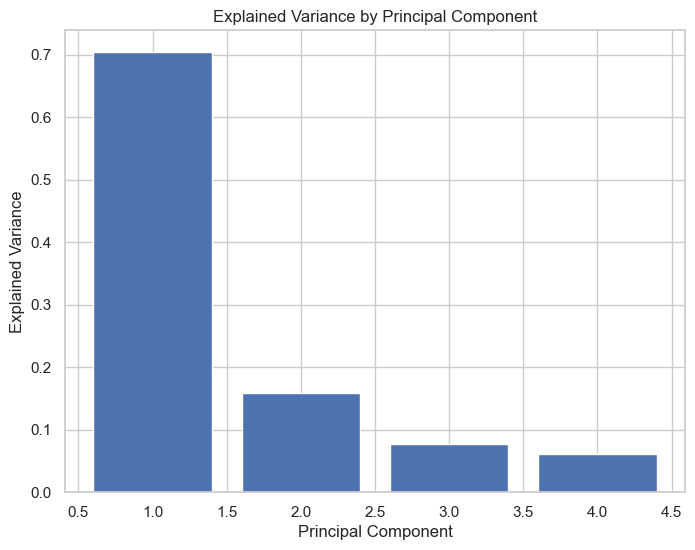

In [29]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ['CO', 'NO2', 'O3', 'SO2']

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f'Explained Variance for PC{i+1}: {var:.4f}')
    
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()




In [30]:
print(pca_result)

[[-1.63216567 -1.06625552  0.56302883 -0.73582978]
 [-1.31216212 -0.6157319   0.36630783 -0.56926563]
 [-2.6546092  -0.740455   -0.74242149  0.16515114]
 ...
 [ 2.35792416 -0.05214182  0.27043518  0.13072862]
 [ 1.4916743  -0.06484719  0.28380804 -0.2140483 ]
 [ 1.32671929 -0.9019347  -0.03039263 -0.43047724]]


In [31]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'Year' and 'State' columns back if needed
pca_df['Year'] = df['Year']
pca_df['State'] = df['State']
pca_df['PM2.5'] = df['PM2.5']

# Print the DataFrame with the first 3 principal components
print(pca_df)



          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


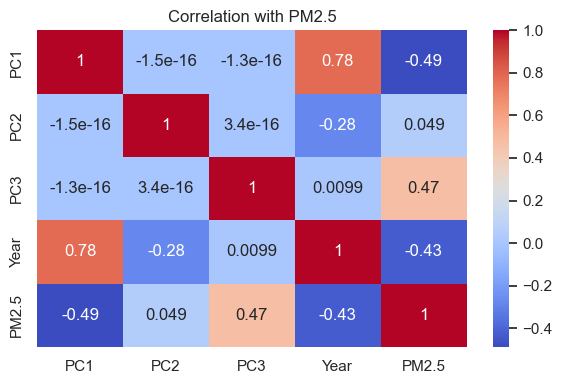

In [32]:
# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = pca_df.corrwith(pca_df['PM2.5'])

# Create a single subplot for the correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot correlation of 'PM2.5' with other features
sn.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation with PM2.5')

plt.tight_layout()
plt.show()


In [33]:
print(pca_df)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


In [34]:
from sklearn.preprocessing import LabelEncoder
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(pca_df, columns=['State'], prefix=['State'])

# Convert the 'Year' column to a categorical variable
data_encoded['Year'] = data_encoded['Year'].astype('category')

# Label encode the 'Year' column
label_encoder = LabelEncoder()
data_encoded['Year'] = label_encoder.fit_transform(data_encoded['Year'])

# Display the preprocessed data
print(data_encoded)

          PC1       PC2       PC3  Year     PM2.5  State_Alabama  \
0   -1.632166 -1.066256  0.563029     0  2.712347              1   
1   -1.312162 -0.615732  0.366308     0  2.491300              0   
2   -2.654609 -0.740455 -0.742421     0  2.001532              0   
3   -2.148175  0.685029 -1.218686     0  2.388467              0   
4   -2.367333 -1.103787 -0.360892     0  1.705032              0   
..        ...       ...       ...   ...       ...            ...   
763  3.360324  0.415647 -0.248117    15  1.686292              0   
764  2.411874  0.244212 -0.509862    15  1.827739              0   
765  2.357924 -0.052142  0.270435    15  1.963984              0   
766  1.491674 -0.064847  0.283808    15  2.025579              0   
767  1.326719 -0.901935 -0.030393    15  1.512608              0   

     State_Arizona  State_Arkansas  State_California  State_Colorado  ...  \
0                0               0                 0               0  ...   
1                0           

## Model Building

In [35]:
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit with 2 splits
tscv = TimeSeriesSplit(n_splits=2)

# Split the data based on the "Year" column
for train_index, test_index in tscv.split(data_encoded):
    train_data = data_encoded.iloc[train_index]
    test_data = data_encoded.iloc[test_index]

# Filter train and test data based on the specified years
train_data = train_data[train_data['Year'] <= 12]
test_data = test_data[(test_data['Year'] >= 13) & (test_data['Year'] <= 15)]

# Separate the independent variables (X) and the target variable (y)
X_train = train_data.drop(columns=['PM2.5', 'Year'])
y_train = train_data['PM2.5']

X_test = test_data.drop(columns=['PM2.5', 'Year'])
y_test = test_data['PM2.5']


In [36]:
y = data_encoded['PM2.5']
x = data_encoded
x.drop('PM2.5',axis = 1, inplace = True)

In [37]:
# Filter the data for the training set (2000 to 2012)
train_data = data_encoded[(data_encoded['Year'] >= 0) & (data_encoded['Year'] <= 12)]

# Filter the data for the test set (2013 to 2015)
test_data = data_encoded[(data_encoded['Year'] >= 13) & (data_encoded['Year'] <= 15)]

# Separate the independent variables (X) and the target variable (y) for both sets
X_train = train_data.drop(columns=['PM2.5'])
y_train = train_data['PM2.5']

X_test = test_data.drop(columns=['PM2.5'])
y_test = test_data['PM2.5']


KeyError: "['PM2.5'] not found in axis"

In [ ]:
print(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(lr,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
cv_score = cross_val_score(dtr,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
cv_score = cross_val_score(rfr,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
cv_score = cross_val_score(lasso,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
cv_score = cross_val_score(knr,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

In [ ]:
cv_score = cross_val_score(ridge,X_train,y_train,cv=5)
cv_mean = cv_score.mean()
cv_mean

In [ ]:
# Initialize a list of regression models
models = [LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=1.0), RandomForestRegressor(n_estimators=100)]

# Initialize lists to store R2 scores
r2_scores = []

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Model names for plotting
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest']

# Create a bar plot of R2 scores
plt.bar(model_names, r2_scores)
plt.xlabel('Regression Models')
plt.ylabel('R-squared (R2) Score')
plt.title('R2 Score Comparison for Different Regression Models')
plt.ylim(0, 1)  # Set the y-axis limits for R2 scores (0 to 1)
plt.show()





Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.

<b>Hyper parameter Tuning<b>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = { 'fit_intercept' : [True,False],
               'n_jobs' : [42,-1,-10,1,10,100,200,500,35,25]
             }


In [ ]:
GCV = GridSearchCV(LinearRegression(),parameter,cv =5)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_mod = LinearRegression(fit_intercept=True,n_jobs=42)
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod,x,y,cv=5)
cv_mean = cv_score.mean()
print(r2,cv_mean)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

# Create a Grid Search Cross-Validation object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_solver = grid_search.best_params_['solver']

# Train a Ridge regression model with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha, solver=best_solver)
best_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ridge.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best Alpha: {best_alpha}")
print(f"Best Solver: {best_solver}")
print(f"Mean Squared Error on Test Data: {mse}")


In [ ]:
# Set the best hyperparameters
best_alpha = 0.1
best_solver = 'saga'

# Create the final Ridge regression model with the best hyperparameters
Final_mod = Ridge(alpha=best_alpha, solver=best_solver)
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod,x,y,cv=5)
cv_mean = cv_score.mean()
print(r2,cv_mean)

## Serialization

In [ ]:
#Saving the model
import joblib
joblib.dump(Final_mod,"PM2.5predictor.pkl")

## Predictions to be made

In [ ]:
# Read the dataset into a DataFrame
df = pd.read_csv('merged_dataset.csv')

In [ ]:
# Load the saved model
loaded_model = joblib.load("PM2.5predictor.pkl")